NMFk example: Mapping variables
---

In [1]:
import NMFk

┌ Info: Recompiling stale cache file /Users/monty/.julia/compiled/v1.2/NMFk/Ywuhu.ji for NMFk [e40cd9e2-a1df-5d90-a1fa-603fdc3dbdd8]
└ @ Base loading.jl:1240
┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot ~/.julia/packages/PyPlot/4wzW1/src/init.jl:192


NMFk: Nonnegative Matrix Factorization + k-means clustering
====

  _     _   _      _   _______   _
 |  \  | | |  \  /  | |  _____| | |  _
 | . \ | | | . \/ . | | |___    | | / /
 | |\ \| | | |\  /| | |  ___|   | |/ /
 | | \ ' | | | \/ | | | |       |   (
 | |  \  | | |    | | | |       | |\ \
 |_|   \_| |_|    |_| |_|       |_| \_\

NMFk performs unsupervised machine learning based on matrix decomposition coupled with sparsity and nonnegativity constraints.
NMFk methodology allows for automatic identification of the optimal number of features (signals) present in two-dimensional data arrays (matrices).
The number of features is estimated automatically.


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8044487027700308256\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-569311881589632987\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8044487027700308256\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/monty/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228
┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/monty/.julia/packages/PyPlot/4wzW1/src/init.jl:192


In [2]:
import Mads

In [14]:
import Statistics

Load test matrices

In [13]:
A = [0.654060        0.142989        0.043485        0.000000        0.000000        0.000000        0.000000
	   1.000000        0.090943        0.048150        0.018898        0.006329        0.001725        0.000258
	   0.076188        0.020636        0.011489        0.006166        0.002998        0.000000        0.000000
	   0.378206        0.098391        0.041083        0.009261        0.000000        0.000000        0.000000
	   0.055413        0.021730        0.010460        0.004788        0.001719        0.000000        0.000000]

B = [0.168427        0.049914        0.031383        0.020747        0.007634        0.004797        0.003955
	   0.959030        0.203276        0.095674        0.043699        0.000000        0.000000        0.000000
	   0.208403        0.064995        0.039014        0.019713        0.002357        0.000000        0.000000
	   0.948621        0.217649        0.101904        0.049093        0.024234        0.012169        0.008160]

X = [0.500        0.002        0.667        0.40
	   0.800        0.200        0.667        0.76
	   0.800        0.100        0.400        0.80
	   0.600        0.010        1.000        0.40]

Y = [1.000        0.600        0.267        1.00
	   0.700        0.020        0.333        0.60
	   1.000        0.020        0.200        0.72
	   0.700        1.000        0.233        0.60
	   1.000        0.060        0.133        0.80]

Z = [0.800        0.400        0.100        0.60];

We want to predict **A**.

__A__ is associated with attribute matrix **X**.

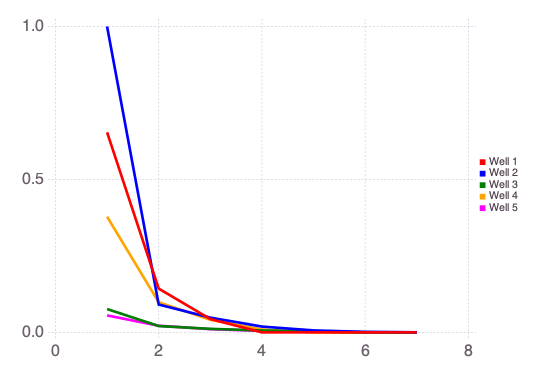

In [8]:
Mads.plotseries(permutedims(A); name="Well")

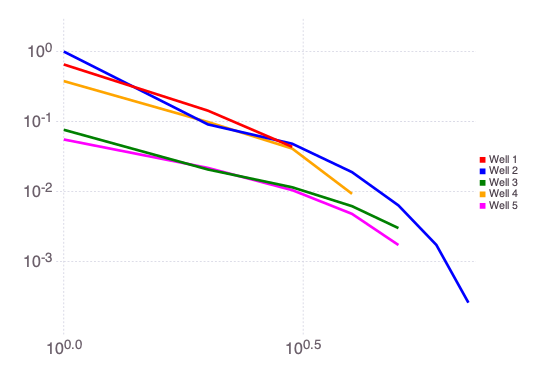

In [9]:
Mads.plotseries(permutedims(A); name="Well", logx=true, logy=true)

In [11]:
pttrue = Mads.plotseries(permutedims(A); name="Well", code=true, quiet=true);

We learn how **X** and __Y__ are mapped.

The mapping is encoded in **H**.

After that, we use **B** to predict __A__.

In [16]:
W, H, of, sil, aic = NMFk.mapping(X, Y, A, B);

In [17]:
Statistics.norm(permutedims(A) .- (permutedims(B) * H))

0.9333142701341315

In [18]:
display(H)

4×5 Array{Float64,2}:
 0.0      0.938024  0.393001  0.542677  0.234123
 0.0      0.0       0.0       0.0       0.0     
 1.22561  0.255018  0.671602  0.498542  0.853742
 0.0      0.0       0.0       0.0       0.0     

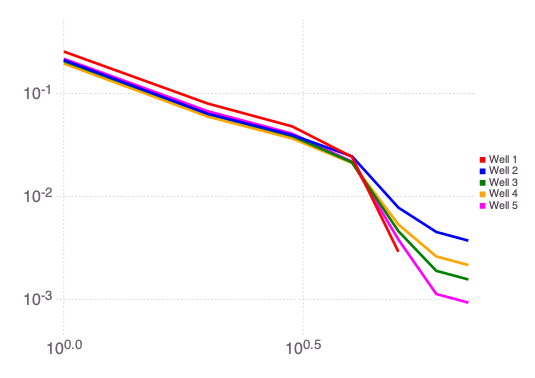

In [21]:
Mads.plotseries(permutedims(B) * H; name="Well", logx=true, logy=true)

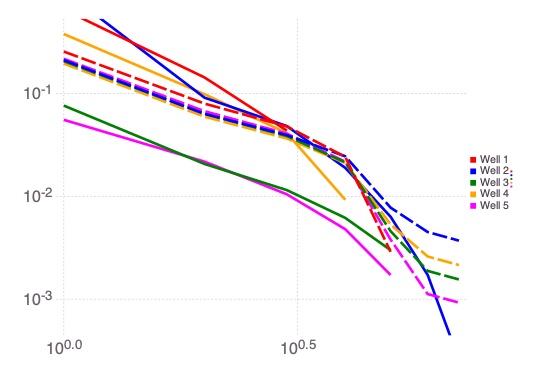

In [22]:
Mads.plotseries(permutedims(B) * H; linestyle=:dash, name="", logx=true, logy=true, gl=pttrue)

In [24]:
W, H, of, sil, aic = NMFk.mapping([X B[:,1:1]], [Y A[:,1:1]], A, B);

In [25]:
Statistics.norm(permutedims(A) .- (permutedims(B) * H))

0.3190528358449396

In [26]:
display(H)

4×5 Array{Float64,2}:
 0.0       0.0       0.0       0.0       0.0   
 0.452507  0.839417  0.0       0.346042  0.0   
 0.748718  0.0       0.986907  0.476589  1.0116
 0.0       0.0       0.0       0.0       0.0   

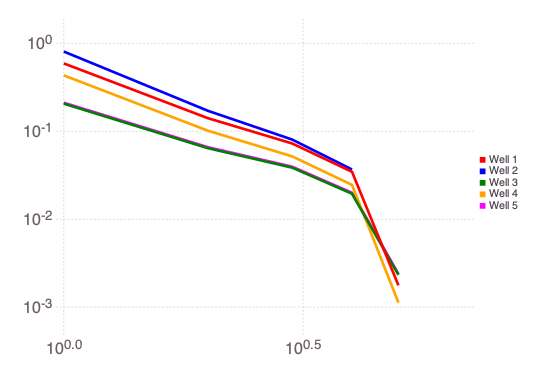

In [27]:
Mads.plotseries(permutedims(B) * H; name="Well", logx=true, logy=true)

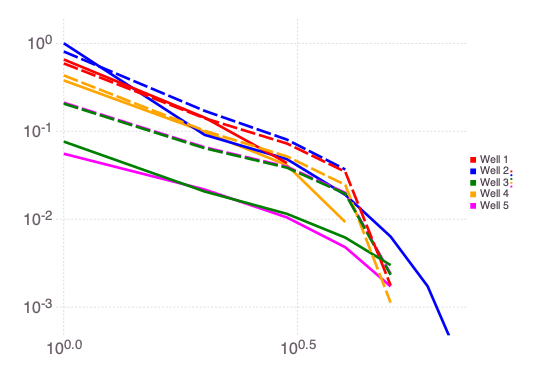

In [28]:
Mads.plotseries(permutedims(B) * H; linestyle=:dash, name="", logx=true, logy=true, gl=pttrue)

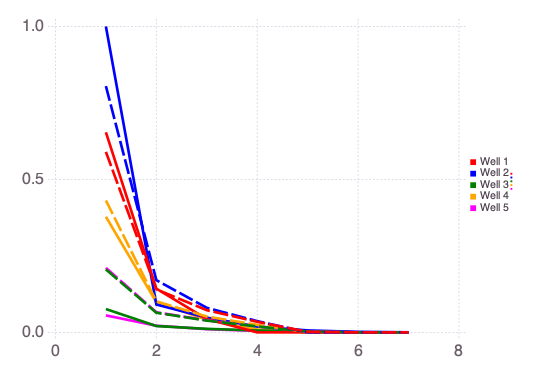

In [29]:
Mads.plotseries(permutedims(B) * H; linestyle=:dash, name="", gl=pttrue)